# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [3]:
import keras
from keras.datasets import cifar10
import numpy as np
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train=y_train.flatten()
y_test=y_test.flatten()

Using TensorFlow backend.


In [4]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

### 2. Visualize the First 24 Training Images

In [6]:
import matplotlib.pyplot as plt
plt.imshow((x_train[2]))

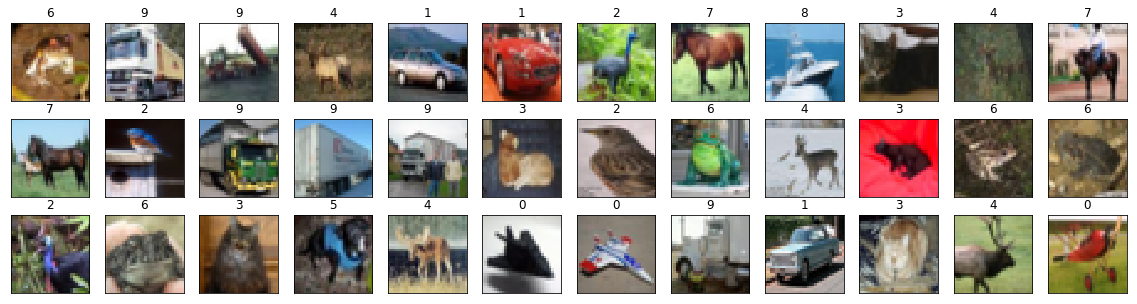

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title(y_train[i])

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [8]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [9]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [10]:
print(np.shape(x_train[1])) 
print(np.shape(y_train[:10]))
y_train[:10]

(32, 32, 3)
(10, 10)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### 5. Define the Model Architecture 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))#相当于三维同时被拍平
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable par

### 6. Compile the Model 

In [12]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### 7. Train the Model 

In [106]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath=r'C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.98231, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\MLP.weights.best.hdf5
 - 68s - loss: 2.3327 - acc: 0.2696 - val_loss: 1.9823 - val_acc: 0.3042
Epoch 2/20
Epoch 00002: val_loss improved from 1.98231 to 1.81636, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\MLP.weights.best.hdf5
 - 69s - loss: 1.8441 - acc: 0.3356 - val_loss: 1.8164 - val_acc: 0.3322
Epoch 3/20
Epoch 00003: val_loss did not improve
 - 67s - loss: 1.7945 - acc: 0.3572 - val_loss: 1.8820 - val_acc: 0.3122
Epoch 4/20
Epoch 00004: val_loss improved from 1.81636 to 1.76232, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\MLP.weights.best.hdf5
 - 72s - loss: 1.7767 - acc: 0.3644 - val_loss: 1.7623 - val_acc: 0.3502
Epoch 5/20
Epoch 00005: val_loss improved from 1.76232 to 1.68015, saving model to C:\Users\zhangwenqi\Desktop\神经网络t

### 8. Load the Model with the Best Classification Accuracy on the Validation Set

In [13]:
# load the weights that yielded the best validation accuracy
model.load_weights(r'C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\MLP.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [14]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4136
